<div style='font-size:20pt'>TextBlob</div>
<b>Objectif: voir si textblob fourni un bon résultat d'analyse de sentiment<br></b>
 -> Appliquer textblob sur les texte et lui faire sortir son analyse de sentiment<br>
 -> Comparer l'analyse de textblob avec le tag du dataset

# Imports

In [2]:
import pandas as pd
import numpy as np
from utils import text_cleaner
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'utils'

# Load data

In [3]:
data = pd.read_csv("../raw_data/Corona_NLP_train.csv")
data_test = pd.read_csv("../raw_data/Corona_NLP_test.csv")

# Clean data

In [3]:
#excluded_words = []
excluded_words = ['aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 
                  'doesn', "doesn't", 'don', "don't", 'hadn', "hadn't", 'hasn', 
                  "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't",
                  'mustn', "mustn't", 'needn', "needn't", 'no', 'nor', 'not', 'shouldn',
                  "shouldn't", 'wasn', "wasn't", 'weren', "weren't", "won't", 'wouldn',
                  "wouldn't", "are", "could", "did", "does", "do", "have", "has", "is",
                  "might", "must", "need", "should", "would", "will"]
included_words = ["rt"]

## Train

In [4]:
cleaner = text_cleaner(df=data, label="OriginalTweet", excluded_sw=excluded_words, included_sw=included_words)
cleaner.lowerize()
cleaner.remove_mentions()
cleaner.remove_hyperlinks()
cleaner.transform_negative()
cleaner.remove_numbers()
cleaner.set_custom_punctuation(more=["’"])
cleaner.clean_punctuation()
cleaner.clean_stopwords()
cleaner.more_cleaning()
cleaner.lemmatize()
cleaner.add_vocabulary_richness()
#
data = cleaner.df.copy()
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,vocabulary_richness
0,3800,48752,UK,16-03-2020,advice talk neighbour family exchange phone nu...,Positive,0.892857
1,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworth give elderly d...,Positive,1.000000
2,3802,48754,NaN,16-03-2020,food stock is not one is empty please do not p...,Positive,0.766667
3,3803,48755,NaN,16-03-2020,ready go supermarket covid outbreak not paran...,Extremely Negative,0.923077
4,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,news region first confirmed covid case came su...,Positive,1.000000


## Test

In [5]:
cleaner = text_cleaner(df=data_test, label="OriginalTweet", excluded_sw=excluded_words, included_sw=included_words)
cleaner.lowerize()
cleaner.remove_mentions()
cleaner.remove_hyperlinks()
cleaner.transform_negative()
cleaner.remove_numbers()
cleaner.set_custom_punctuation(more=["’"])
cleaner.clean_punctuation()
cleaner.clean_stopwords()
cleaner.more_cleaning()
cleaner.lemmatize()
cleaner.add_vocabulary_richness()
#
data_test = cleaner.df.copy()
data_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,vocabulary_richness
0,1,44953,NYC,02-03-2020,trending new yorkers encounter empty supermark...,Extremely Negative,1.000000
1,2,44954,"Seattle, WA",02-03-2020,could not find hand sanitizer fred meyer turne...,Positive,1.000000
2,3,44955,NaN,02-03-2020,find protect loved one coronavirus,Extremely Positive,1.000000
3,4,44956,Chicagoland,02-03-2020,panic buying hit newyork city anxious shopper...,Negative,0.928571
4,5,44957,"Melbourne, Victoria",03-03-2020,toiletpaper dunnypaper coronavirus coronaviru...,Neutral,0.913043


# Add Subjectivity and Polarity columns to the data frame

In [6]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

## Train

In [7]:
data["subjectivity"] = data["OriginalTweet"].apply(get_subjectivity)
data["polarity"] = data["OriginalTweet"].apply(get_polarity)
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,vocabulary_richness,subjectivity,polarity
0,3800,48752,UK,16-03-2020,advice talk neighbour family exchange phone nu...,Positive,0.892857,0.205128,0.166667
1,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworth give elderly d...,Positive,1.000000,0.300000,-0.200000
2,3802,48754,NaN,16-03-2020,food stock is not one is empty please do not p...,Positive,0.766667,0.562500,0.175000
3,3803,48755,NaN,16-03-2020,ready go supermarket covid outbreak not paran...,Extremely Negative,0.923077,0.555556,-0.077778
4,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,news region first confirmed covid case came su...,Positive,1.000000,0.400000,0.263333


## Test

In [8]:
data_test["subjectivity"] = data_test["OriginalTweet"].apply(get_subjectivity)
data_test["polarity"] = data_test["OriginalTweet"].apply(get_polarity)
data_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,vocabulary_richness,subjectivity,polarity
0,1,44953,NYC,02-03-2020,trending new yorkers encounter empty supermark...,Extremely Negative,1.000000,0.477273,0.018182
1,2,44954,"Seattle, WA",02-03-2020,could not find hand sanitizer fred meyer turne...,Positive,1.000000,0.000000,0.000000
2,3,44955,NaN,02-03-2020,find protect loved one coronavirus,Extremely Positive,1.000000,0.800000,0.700000
3,4,44956,Chicagoland,02-03-2020,panic buying hit newyork city anxious shopper...,Negative,0.928571,0.666667,0.050000
4,5,44957,"Melbourne, Victoria",03-03-2020,toiletpaper dunnypaper coronavirus coronaviru...,Neutral,0.913043,0.000000,-0.016667


# Analysis

## Word cloud

### Train

In [9]:
all_words = " ".join([text for text in data["OriginalTweet"]])

In [10]:
len(all_words)

5480268

In [11]:
wordcloud_ = WordCloud(width=800, height=400, max_font_size=120, background_color="white").generate(all_words)

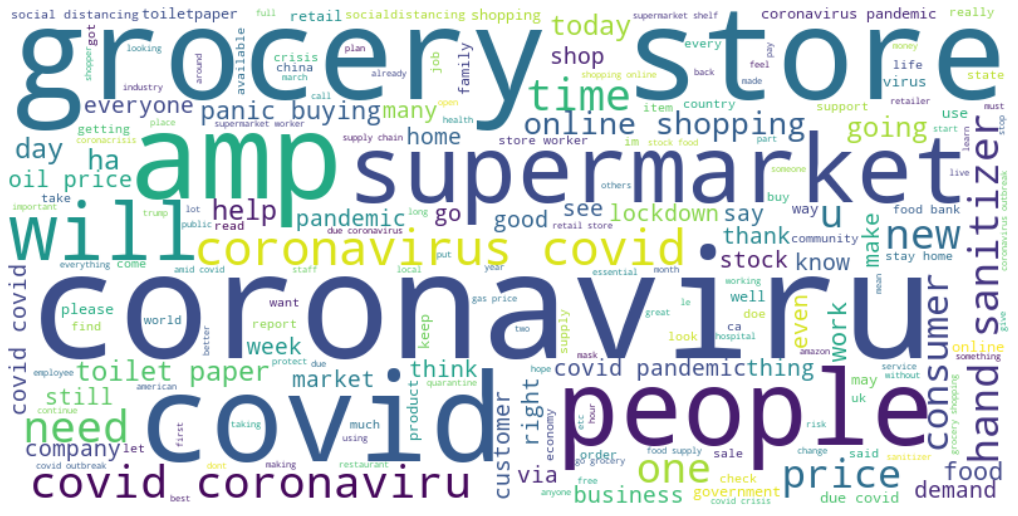

In [12]:
plt.figure(figsize=(18,10))
plt.imshow(wordcloud_, interpolation='bilinear')
plt.axis("off")
plt.show()

### Test

In [13]:
all_words_test = " ".join([text for text in data_test["OriginalTweet"]])

In [14]:
len(all_words_test)

530725

In [15]:
wordcloud_test = WordCloud(width=800, height=400, max_font_size=120, background_color="white").generate(all_words_test)

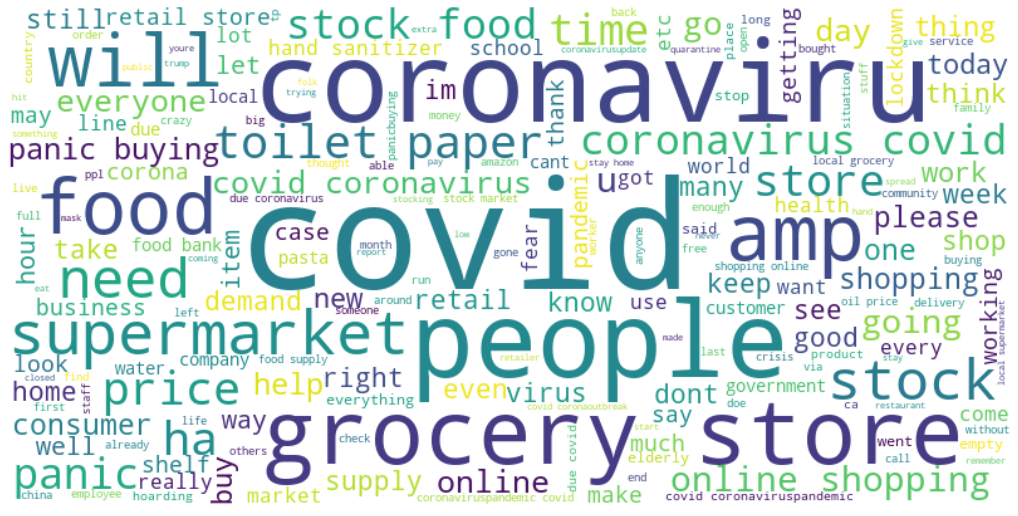

In [16]:
plt.figure(figsize=(18,10))
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment calculator

In [17]:
def get_analysis(score):
    if score < 0:
        return "Negative"
    elif score > 0:
        return "Positive"
    else:
        return "Neutral"

### Train

In [18]:
data["textblob_analysis"] = data["polarity"].apply(get_analysis)
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,vocabulary_richness,subjectivity,polarity,textblob_analysis
0,3800,48752,UK,16-03-2020,advice talk neighbour family exchange phone nu...,Positive,0.892857,0.205128,0.166667,Positive
1,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworth give elderly d...,Positive,1.000000,0.300000,-0.200000,Negative
2,3802,48754,NaN,16-03-2020,food stock is not one is empty please do not p...,Positive,0.766667,0.562500,0.175000,Positive
3,3803,48755,NaN,16-03-2020,ready go supermarket covid outbreak not paran...,Extremely Negative,0.923077,0.555556,-0.077778,Negative
4,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,news region first confirmed covid case came su...,Positive,1.000000,0.400000,0.263333,Positive


In [19]:
display(data.shape)

(41125, 10)

### Test

In [20]:
data_test["textblob_analysis"] = data_test["polarity"].apply(get_analysis)
data_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,vocabulary_richness,subjectivity,polarity,textblob_analysis
0,1,44953,NYC,02-03-2020,trending new yorkers encounter empty supermark...,Extremely Negative,1.000000,0.477273,0.018182,Positive
1,2,44954,"Seattle, WA",02-03-2020,could not find hand sanitizer fred meyer turne...,Positive,1.000000,0.000000,0.000000,Neutral
2,3,44955,NaN,02-03-2020,find protect loved one coronavirus,Extremely Positive,1.000000,0.800000,0.700000,Positive
3,4,44956,Chicagoland,02-03-2020,panic buying hit newyork city anxious shopper...,Negative,0.928571,0.666667,0.050000,Positive
4,5,44957,"Melbourne, Victoria",03-03-2020,toiletpaper dunnypaper coronavirus coronaviru...,Neutral,0.913043,0.000000,-0.016667,Negative


In [21]:
display(data_test.shape)

(3796, 10)

## A bit of engineering on Sentiment column

### Train

In [22]:
data["Sentiment_custom"] = data["Sentiment"].apply(lambda x: "Negative" if x.find("Negative")>=0 else ("Positive" if x.find("Positive")>=0 else "Neutral"))
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,vocabulary_richness,subjectivity,polarity,textblob_analysis,Sentiment_custom
0,3800,48752,UK,16-03-2020,advice talk neighbour family exchange phone nu...,Positive,0.892857,0.205128,0.166667,Positive,Positive
1,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworth give elderly d...,Positive,1.000000,0.300000,-0.200000,Negative,Positive
2,3802,48754,NaN,16-03-2020,food stock is not one is empty please do not p...,Positive,0.766667,0.562500,0.175000,Positive,Positive
3,3803,48755,NaN,16-03-2020,ready go supermarket covid outbreak not paran...,Extremely Negative,0.923077,0.555556,-0.077778,Negative,Negative
4,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,news region first confirmed covid case came su...,Positive,1.000000,0.400000,0.263333,Positive,Positive


### Test

In [23]:
data_test["Sentiment_custom"] = data_test["Sentiment"].apply(lambda x: "Negative" if x.find("Negative")>=0 else ("Positive" if x.find("Positive")>=0 else "Neutral"))
data_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,vocabulary_richness,subjectivity,polarity,textblob_analysis,Sentiment_custom
0,1,44953,NYC,02-03-2020,trending new yorkers encounter empty supermark...,Extremely Negative,1.000000,0.477273,0.018182,Positive,Negative
1,2,44954,"Seattle, WA",02-03-2020,could not find hand sanitizer fred meyer turne...,Positive,1.000000,0.000000,0.000000,Neutral,Positive
2,3,44955,NaN,02-03-2020,find protect loved one coronavirus,Extremely Positive,1.000000,0.800000,0.700000,Positive,Positive
3,4,44956,Chicagoland,02-03-2020,panic buying hit newyork city anxious shopper...,Negative,0.928571,0.666667,0.050000,Positive,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,toiletpaper dunnypaper coronavirus coronaviru...,Neutral,0.913043,0.000000,-0.016667,Negative,Neutral


## Performance

### Train

In [24]:
TP = 0
TN = 0
FP = 0
FN = 0
#
for val_true, val_calc in zip(list(data["Sentiment_custom"]), list(data["textblob_analysis"])):
    if val_calc == "Positive":
        if val_true == "Positive":
            TP += 1
        elif val_true == "Negative":
            FP += 1
    elif val_calc == "Negative":
        if val_true == "Positive":
            FN += 1
        elif val_true == "Negative":
            TN += 1        

In [25]:
display("True Positive: " + str(TP))
display("True Negative: " + str(TN))
display("False Positive: " + str(FP))
display("False Negative: " + str(FN))

'True Positive: 11367'

'True Negative: 6293'

'False Positive: 4933'

'False Negative: 2725'

In [26]:
display("Accuracy of this TextBlob analysis: " +  str(round((TP + TN)*100/(TP + TN + FP + FN), 1)) + "%")
display("Precision of this TextBlob analysis: " +  str(round((TP)*100/(TP + FP), 1)) + "%")
display("Recall (sensitivity) of this TextBlob analysis: " +  str(round((TP)*100/(TP + FN), 1)) + "%")

'Accuracy of this TextBlob analysis: 69.8%'

'Precision of this TextBlob analysis: 69.7%'

'Recall (sensitivity) of this TextBlob analysis: 80.7%'

### Test

In [27]:
TP_test = 0
TN_test = 0
FP_test = 0
FN_test = 0
#
for val_true, val_calc in zip(list(data_test["Sentiment_custom"]), list(data_test["textblob_analysis"])):
    if val_calc == "Positive":
        if val_true == "Positive":
            TP_test += 1
        elif val_true == "Negative":
            FP_test += 1
    elif val_calc == "Negative":
        if val_true == "Positive":
            FN_test += 1
        elif val_true == "Negative":
            TN_test += 1 

In [28]:
display("True Positive: " + str(TP_test))
display("True Negative: " + str(TN_test))
display("False Positive: " + str(FP_test))
display("False Negative: " + str(FN_test))

'True Positive: 1016'

'True Negative: 763'

'False Positive: 518'

'False Negative: 303'

In [29]:
display("Accuracy of this TextBlob analysis: " +  str(round((TP_test + TN_test)*100/(TP_test + TN_test + FP_test + FN_test), 1)) + "%")
display("Precision of this TextBlob analysis: " +  str(round((TP_test)*100/(TP_test + FP_test), 1)) + "%")
display("Recall (sensitivity) of this TextBlob analysis: " +  str(round((TP_test)*100/(TP_test + FN_test), 1)) + "%")

'Accuracy of this TextBlob analysis: 68.4%'

'Precision of this TextBlob analysis: 66.2%'

'Recall (sensitivity) of this TextBlob analysis: 77.0%'

# CUSTOM TESTS

In [30]:
text1 = "This sentence is a very positive sentence, it be better."
text2 = "I don't give a shit about this. I won't do it"
df_test = pd.DataFrame({"text": [text1, text2]})
df_test

,text
0,"This sentence is a very positive sentence, it ..."
1,I don't give a shit about this. I won't do it


In [31]:
cleaner_sandbox = text_cleaner(df=df_test, label="text", excluded_sw=excluded_words, included_sw=included_words)
cleaner_sandbox.lowerize()
cleaner_sandbox.remove_mentions()
cleaner_sandbox.remove_hyperlinks()
cleaner_sandbox.transform_negative()
cleaner_sandbox.remove_numbers()
cleaner_sandbox.set_custom_punctuation(more=["’"])
cleaner_sandbox.clean_punctuation()
cleaner_sandbox.clean_stopwords()
cleaner_sandbox.more_cleaning()
cleaner_sandbox.lemmatize()
cleaner_sandbox.add_vocabulary_richness()
#
data_sandbox = cleaner_sandbox.df.copy()
data_sandbox.head()

,text,vocabulary_richness
0,sentence is positive sentence better,0.800000
1,do not give shit will not do,0.714286


In [32]:
data_sandbox["subjectivity"] = data_sandbox["text"].apply(get_subjectivity)
data_sandbox["polarity"] = data_sandbox["text"].apply(get_polarity)
data_sandbox.head()

,text,vocabulary_richness,subjectivity,polarity
0,sentence is positive sentence better,0.800000,0.522727,0.363636
1,do not give shit will not do,0.714286,0.800000,-0.200000
